### SVM - Implementation
The idea behind the support vector machine is to find a hyperplane in an N-dimensional Space that distinctly separates the classes. There are many possible hyperplanes, to separate the data points of the classes. But the objective of this algorithm is to find the hyperplane that best separates the classes. This is the one with maximum margin.

<img src="img/pos_hyperplane.png"/>

<img src="img/hyperplane_eq.png"/>


#### Linear Model 
The equation of the hyperplane that lies in the middle of the street:

$w.x - b = 0$

The equatios of the boundaries at the edges of the street:

$w.x_i - b \ge 1$   if  $ y_i = 1$ <br/>
$w.x_i - b \le -1$  if  $ y_i = -1$

The constraint that should be satisfied:<br/>
$y_i(w.x_i - b) \ge 1$ 

#### Cost function
<b>Hinge Loss:</b> <br/>
$ l = max(0, 1 - y_i(w.x_i - b))$

#### Add Regularization
$ J = \lambda \parallel w \parallel^2 + \frac{1}{n} \sum_{i=1}^n max(0, 1-y_i(w.x_i - b))$

if $y_i.f(x) \ge 1$ :<br/>
$J_i = \lambda \parallel w \parallel^2$  <br/>
else: <br/>
$ J = \lambda \parallel w \parallel^2 + 1 - y_i(w.x_i - b)$

#### Gradients
if $y_i.f(x_i) \ge 1$:<br/>
$ \frac{dJ_i}{dw_k} = 2\lambda w_k$  <br/>
$ \frac{dJ_i}{db} = 0$  <br/>
else:  <br/>
$ \frac{dJ_i}{dw_k} = 2\lambda w_k - y_i.x_i$<br/>
$ \frac{dJ_i}{db} = 0$ 

#### Update Rule
For each training sample $x_i$: <br/>
$w = w - \alpha . dw$ <br/>
$b = b - \alpha . db$

In [3]:
import numpy as np

class SVM:
    def __init__(self, learning_rate = 0.001, lambda_param=0.001, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
    
    def fit(self, X,y):
        y_ = np.where(y <= 0, -1, 1)
        n_samples, n_features = X.shape
        
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]
    
    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)
        

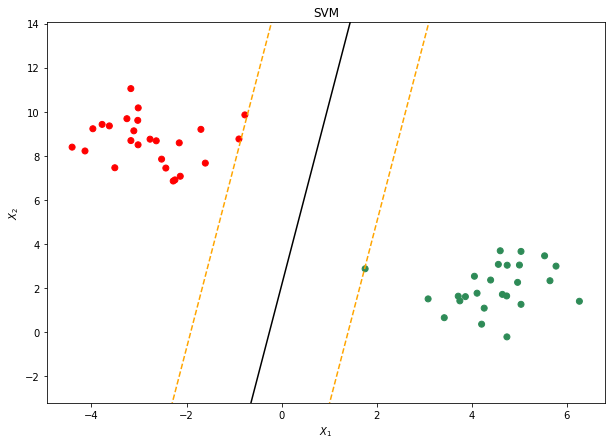

In [39]:
import matplotlib.pyplot as plt
from sklearn import datasets
import matplotlib.colors as mcolors

# Generate data
X, y = datasets.make_blobs(n_samples=50,
                          n_features=2,
                          centers=2,
                          cluster_std=1.1,
                          random_state=42)
y = np.where(y==0, -1, 1)

# train model
clf = SVM()
clf.fit(X,y)


#Visuallize data
def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x + b + offset) / w[1]   # Ax + By + C = 0, y =  .....
    
cmap_dp = mcolors.ListedColormap(['red', 'seagreen'])    
fig, ax = plt.subplots(figsize=(10,7))
_ = ax.scatter(X[:,0], X[:,1], c = y, cmap=cmap_dp)
_ = ax.set(xlabel=r'$X_1$', ylabel=r'$X_2$', title='SVM')


x0_1 = np.amin(X[:, 0])
x0_2 = np.amax(X[:, 0])

# two points on hyperplace(line in the middle)
x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

# two points of the line on the margin
x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

# two points of the line on the margin
x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)


_ = ax.plot([x0_1, x0_2], [x1_1, x1_2], "k-")
_ = ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], color='orange', linestyle='--')
_ = ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], color='orange', linestyle='--')

x1_min = np.amin(X[:, 1])
x1_max = np.amax(X[:, 1])
_ = ax.set_ylim([x1_min - 3, x1_max + 3])